# Case Study: Oltepesi 
### Author : Eric Mwangi Githinji
### Emial: djricmwas@gmail.com 

You are a Data Analyst in the HR department of a floriculture company, responsible for evaluating harvester 
performance, calculating hiring needs, and analyzing workforce management data. You are provided with datasets 
containing details about each harvester’s performance, absenteeism, and related HR metrics. Your goal is to use this 
data to optimize hiring decisions and performance evaluations. 

# STEPS FOLLOWED
The first step is to import the required libraries. These libraries include pandas for data manipulation, numpy for efficient arithmetic calculations, and seaborn and matplotlib for data visualization. 

In [159]:
import pandas as pd # Data manupilation 
import numpy as np #Calculations
import seaborn as sn #visualization
import matplotlib.pyplot as plt 

The next stage is to import the Harvesters Performance Data and have a overview of the data.

In [160]:
hr_df= pd.read_excel('Oltepesi.xlsx', sheet_name='Harvesters Performance Data')
hr_df.head()

,Employee ID,Week,Speed of Harvest,Quality of Harvest,Absenteeism
0,E001,Week 1,869,30,6
1,E002,Week 1,1935,9,12
2,E003,Week 1,925,13,1
3,E004,Week 1,522,16,8
4,E005,Week 1,1943,7,5


In [161]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee ID         2600 non-null   object
 1   Week                2600 non-null   object
 2   Speed of Harvest    2600 non-null   int64 
 3   Quality of Harvest  2600 non-null   int64 
 4   Absenteeism         2600 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 101.7+ KB


The head() function displays the first few rows of the dataset, while the info() function provides detailed information about the data columns. The dataset contains 2,600 rows and 5 columns, as described below:

Employee ID (object) – A unique identifier for each harvester. It has no missing values.
Week (object) – Represents the specific week of data collection. It has no missing values.
Speed of Harvest (int64) – Indicates the rate at which each harvester completes their tasks. Higher values suggest faster harvesting. It has no missing values.
Quality of Harvest (int64) – A score representing the quality of the harvested crops. Higher values indicate better quality. It has no missing values.
Absenteeism (int64) – The number of hours an employee was absent in a given week. It has no missing values.

KPIs 
Speed = Total cuttings harvested/Total hours taken to harvest 
Quality = Number of mistakes per bag of harvest 
Working hours per week (5 days) = 30 hours 
Production = Number of flower cuttings harvested 

# Task 1 - Performance and Evaluation  
Use the Harvesters Performance Data to; 
• Calculate the overall performance score for each harvester using their weekly average speed and quality. Refer 
to the provided scoring table for speed and quality parameters. 
To calculate the the overall performance for each harvester we will create a new dataframe that contains the avarge metics for each harvaster. To achive this we group by employee id and get the mean for speed quality  and absentism. We can view the table using the head function. 

In [162]:
performance_df= hr_df.groupby('Employee ID')[["Speed of Harvest", "Quality of Harvest", "Absenteeism"]].mean().reset_index()
performance_df.columns= ["Employee ID", "Avg_Speed", "Avg_Quality", "Avg_Absenteeism"]
performance_df.head()

,Employee ID,Avg_Speed,Avg_Quality,Avg_Absenteeism
0,E001,949.653846,15.980769,5.961538
1,E002,1021.519231,14.711538,6.423077
2,E003,1106.865385,15.884615,6.980769
3,E004,1086.519231,15.423077,6.788462
4,E005,1123.865385,16.980769,5.346154


• Using the Outcome Table, determine the employment outcome (e.g., "Contract Renewed" or "Contract 
Terminated") for each employee. 
For this case we will create three new columns 1. For speed score and 2. For quality score for the table below.

![The Score table](Score.PNG)

Finally we will add the third column 'outome' using the condition shown in the table below. For the final column we can take advatage of the merge function. This funtion we performe a left join on the data. 

![The Score table](outcome.PNG)


In [163]:
# Apply np.select
#speed
speed_conditions = [
    performance_df['Avg_Speed'] >= 1000,
    (performance_df['Avg_Speed'] >= 500) & (performance_df['Avg_Speed'] <= 999),
    performance_df['Avg_Speed'] <= 499
]
speed_values = ['1.0', '0.8','0.6']
performance_df['speed_score'] = np.select(speed_conditions, speed_values, default="Unknown").astype(float)

#Quality
quality_conditions = [
    performance_df['Avg_Quality'] >= 11,
    (performance_df['Avg_Quality'] >= 6) & (performance_df['Avg_Quality'] <= 10),
    performance_df['Avg_Quality'] <= 5
]
quality_values =  [*reversed(['1.0','0.8','0.6'])]
performance_df['quality_score'] = np.select(quality_conditions, quality_values, default="Unknown").astype(float)

performance_df.head()

,Employee ID,Avg_Speed,Avg_Quality,Avg_Absenteeism,speed_score,quality_score
0,E001,949.653846,15.980769,5.961538,0.8,0.6
1,E002,1021.519231,14.711538,6.423077,1.0,0.6
2,E003,1106.865385,15.884615,6.980769,1.0,0.6
3,E004,1086.519231,15.423077,6.788462,1.0,0.6
4,E005,1123.865385,16.980769,5.346154,1.0,0.6


In [164]:
outcome_df= pd.read_excel('Oltepesi.xlsx', sheet_name='Outcome Table')
outcome_df.columns= ['speed_score',	'quality_score', 'outcome']
# Merge df with lookup_table to add the Outcome column
performance_df = performance_df.merge(outcome_df, on=['speed_score','quality_score'], how='left')
performance_df.head()

,Employee ID,Avg_Speed,Avg_Quality,Avg_Absenteeism,speed_score,quality_score,outcome
0,E001,949.653846,15.980769,5.961538,0.8,0.6,Contract Terminated
1,E002,1021.519231,14.711538,6.423077,1.0,0.6,Contract Under Review
2,E003,1106.865385,15.884615,6.980769,1.0,0.6,Contract Under Review
3,E004,1086.519231,15.423077,6.788462,1.0,0.6,Contract Under Review
4,E005,1123.865385,16.980769,5.346154,1.0,0.6,Contract Under Review


• Create a table summarizing the weekly averages for speed, quality, absenteeism, and total performance scores. 
Use data bars for performance scores and colour scales for absenteeism 

In [165]:
# Apply np.select
#speed
speed_conditions = [
    hr_df['Speed of Harvest'] >= 1000,
    (hr_df['Speed of Harvest'] >= 500) & (hr_df['Speed of Harvest'] <= 999),
    hr_df['Speed of Harvest'] <= 499
]
speed_values = ['1.0', '0.8','0.6']
hr_df['speed_score'] = np.select(speed_conditions, speed_values, default="Unknown").astype(float)

#Quality
quality_conditions = [
    hr_df['Quality of Harvest'] >= 11,
    (hr_df['Quality of Harvest'] >= 6) & (hr_df['Quality of Harvest'] <= 10),
    hr_df['Quality of Harvest'] <= 5
]
quality_values =  [*reversed(['1.0','0.8','0.6'])]
hr_df['quality_score'] = np.select(quality_conditions, quality_values, default="Unknown").astype(float)

hr_df.head()

,Employee ID,Week,Speed of Harvest,Quality of Harvest,Absenteeism,speed_score,quality_score
0,E001,Week 1,869,30,6,0.8,0.6
1,E002,Week 1,1935,9,12,1.0,0.8
2,E003,Week 1,925,13,1,0.8,0.6
3,E004,Week 1,522,16,8,0.8,0.6
4,E005,Week 1,1943,7,5,1.0,0.8


In [166]:
weekly_performance_df= hr_df.groupby('Week').agg({
    'Speed of Harvest': 'mean',    # Average speed
    'Quality of Harvest': 'mean',  # Average quality
    'Absenteeism': 'mean',           # Average absenteeism
    'speed_score': 'sum',	 # Total speed_score
    'quality_score': 'sum' # Total quality_score
}).reset_index()

#oder the data by weeks 

weekly_performance_df['Week Number'] = weekly_performance_df['Week'].str.extract(r'(\d+)').astype(int)
weekly_performance_df = weekly_performance_df.sort_values(by='Week Number')
weekly_performance_df.reset_index(drop=True, inplace=True)

weekly_performance_df.head()


,Week,Speed of Harvest,Quality of Harvest,Absenteeism,speed_score,quality_score,Week Number
0,Week 1,1005.34,14.22,5.46,42.2,36.0,1
1,Week 2,1014.26,13.66,5.54,42.8,37.6,2
2,Week 3,1008.90,15.46,5.68,42.0,36.0,3
3,Week 4,992.62,16.42,6.56,42.4,35.0,4
4,Week 5,1076.48,12.66,6.90,44.0,37.2,5


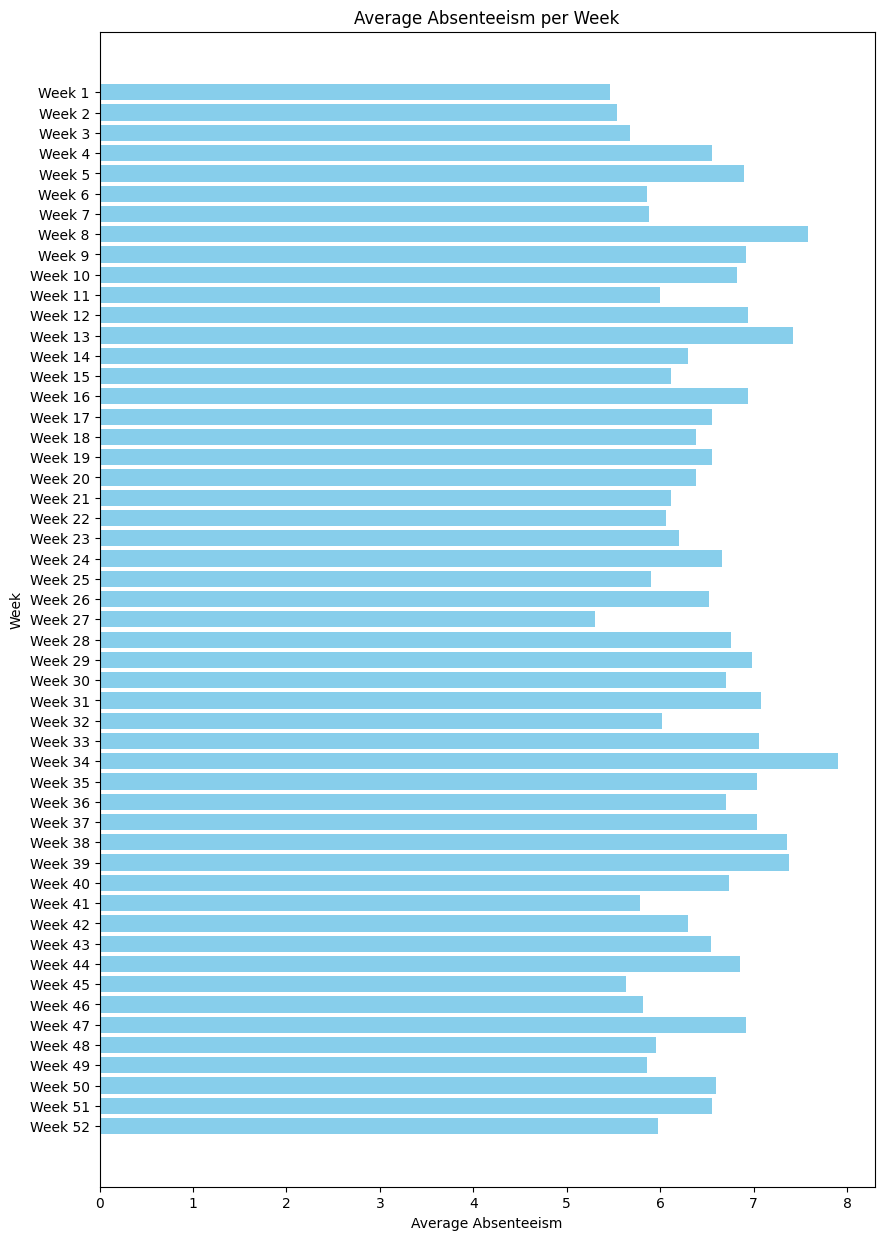

In [167]:
# Plotting
plt.figure(figsize=(10, 15))
plt.barh(weekly_performance_df["Week"], weekly_performance_df["Absenteeism"], color="skyblue")  # Horizontal bar chart

# Labels and Title
plt.xlabel("Average Absenteeism")
plt.ylabel("Week")
plt.title("Average Absenteeism per Week")
plt.gca().invert_yaxis()  # Invert y-axis so Week 1 is at the top

# Show the plot
plt.show()

In [168]:
import plotly.express as px

# Create Horizontal Bar Chart with Plotly
fig = px.bar(weekly_performance_df, 
             x="Absenteeism", 
             y="Week", 
             orientation='h',  # Horizontal bar chart
             title="Average Absenteeism per Week",
             color="Absenteeism",  # Color scale based on values
             color_continuous_scale="Blues",
             category_orders={"Week": weekly_performance_df["Week"].tolist()} )  # Choose a color theme

# Customize Layout
fig.update_layout(
    xaxis_title="Average Absenteeism",
    yaxis_title="Week",
    template="plotly_dark",  # Try "plotly", "ggplot2", etc. for different styles
    height=800,  # Increase height (default is ~450)
    width=1000   # Optionally increase width for better spacing
)

# Show Plot
fig.show()

![Average Absenteeism per Week](plot1.PNG)

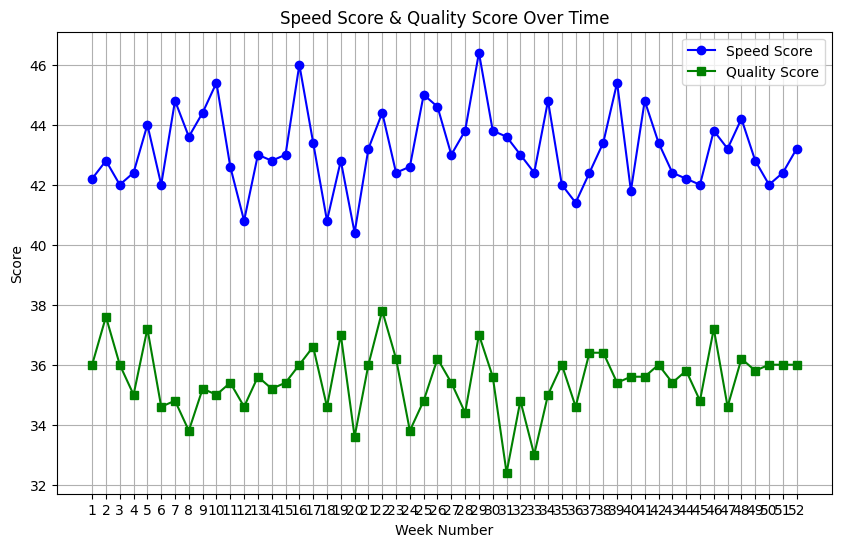

In [169]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekly_performance_df["Week Number"], weekly_performance_df["speed_score"], marker="o", linestyle="-", label="Speed Score", color="blue")
plt.plot(weekly_performance_df["Week Number"], weekly_performance_df["quality_score"], marker="s", linestyle="-", label="Quality Score", color="green")

# Labels and Title
plt.xlabel("Week Number")
plt.ylabel("Score")
plt.title("Speed Score & Quality Score Over Time")
plt.xticks(weekly_performance_df["Week Number"])  # Ensure x-axis shows all weeks
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [170]:

import plotly.express as px

# Reshaping the Data for Plotly
df_melted = weekly_performance_df.melt(id_vars=["Week Number"], value_vars=["speed_score", "quality_score"],
                     var_name="Metric", value_name="Score")

# Create Line Plot
fig = px.line(df_melted, x="Week Number", y="Score", color="Metric", 
              markers=True, title="Speed Score & Quality Score Over Time")

# Customize Layout
fig.update_layout(
    xaxis_title="Week",
    yaxis_title="Score",
    template="plotly_dark",  # Try "plotly", "ggplot2", "seaborn" for different styles
    hovermode="x unified"
)

# Show Plot
fig.show()


![Speed Score & Quality Score Over Time](plot1.PNG)

# Task 2 - Hiring Needs  
Use the Projected production data for 2026 to; 
• Calculate the number of employees needed for each week to meet the weekly demand based on projected 
production and current performance.  


We need to get the current production which will be.
Expected working hours(30)-Absentiseem= working hours
Production = working hours * speed of the harvestor. 


• Compare the weekly hiring needs with the current number of employees. Suggest whether to hire, retain, or 
downsize. 
If current number of employees is higher than the expected number of employee then we need to down size. 

In [171]:
hr_df['Current_production']= (30-np.array(hr_df['Absenteeism']))*np.array(hr_df['Speed of Harvest'])
current_production_df= hr_df.groupby('Week').agg({
    'Employee ID': 'count',
    'Current_production': 'sum' 
}).reset_index()
current_production_df.columns=['Week','Employee Count','Current_production']
current_production_df=current_production_df.merge(pd.read_excel('Oltepesi.xlsx',sheet_name='Projected production data'), on='Week',how='left')
current_production_df['Expected_workers_2026']= (np.array(current_production_df['Employee Count'])* \
                                                 np.array(current_production_df['Projected Production']))/ \
                                                    np.array(current_production_df['Current_production'])
current_production_df['Expected_workers_2026']= round(current_production_df['Expected_workers_2026'])
current_production_df['Hiring Decision'] = np.where(current_production_df['Expected_workers_2026'] > current_production_df['Employee Count'], 'Hire',
                         np.where(current_production_df['Expected_workers_2026'] < current_production_df['Employee Count'], 'Downsize', 
                                  'Retain'))
current_production_df['Week Number'] = current_production_df['Week'].str.extract(r'(\d+)').astype(int)
current_production_df = current_production_df.sort_values(by='Week Number')
current_production_df.head()

,Week,Employee Count,Current_production,Projected Production,Expected_workers_2026,Hiring Decision,Week Number
0,Week 1,50,1255396,607937,24.0,Downsize,1
11,Week 2,50,1231607,634452,26.0,Downsize,2
22,Week 3,50,1205144,919859,38.0,Downsize,3
33,Week 4,50,1186278,929643,39.0,Downsize,4
44,Week 5,50,1227542,946886,39.0,Downsize,5


Create a monthly column


In [172]:
current_production_df['Month'] = np.ceil(current_production_df['Week Number'] / 4.33).astype(int)
current_production_df
monthly_production_df= current_production_df.groupby('Month').agg({
    'Current_production': 'sum',	 # Total current production
    'Projected Production': 'sum' # Total projected production
}).reset_index()
monthly_production_df.tail()

,Month,Current_production,Projected Production
8,9,4496495,2802859
9,10,6219513,4037029
10,11,4968270,3015656
11,12,5047488,2812135
12,13,1383701,504538


In [173]:
# Reshaping the Data for Plotly
df_melted = monthly_production_df.melt(id_vars=["Month"], value_vars=['Current_production',	'Projected Production'],
                     var_name="Type", value_name="Production")

# Create Line Plot
fig = px.line(df_melted, x="Month", y="Production", color="Type", 
              markers=True, title="Current Production & Projected Production")

# Customize Layout
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Production",
    template="plotly_dark",  # Try "plotly", "ggplot2", "seaborn" for different styles
    hovermode="x unified"
)

# Show Plot
fig.show()

![Current Production & Projected Production](plot2.PNG)

In [174]:
harvesters_df= current_production_df.groupby('Month').agg({
    'Employee Count': 'sum',	 # Total current production
    'Expected_workers_2026': 'sum' # Total projected production
}).reset_index()
harvesters_df.tail()



,Month,Employee Count,Expected_workers_2026
8,9,200,124.0
9,10,250,164.0
10,11,200,121.0
11,12,200,112.0
12,13,50,18.0


• Create a visualization comparing current harvesters versus required harvesters for each month.

In [175]:
# Reshaping the Data for Plotly
df_melted = harvesters_df.melt(id_vars=["Month"], value_vars=['Employee Count',	'Expected_workers_2026'],
                     var_name="Type", value_name="Harvesters")

# Create Line Plot
fig = px.line(df_melted, x="Month", y="Harvesters", color="Type", 
              markers=True, title="Current Harvesters versus Required Harvesters")

# Customize Layout
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Number of Harvester",
    template="plotly_dark",  # Try "plotly", "ggplot2", "seaborn" for different styles
    hovermode="x unified"
)

# Show Plot
fig.show()

![Current Harvesters versus Required Harvesters](plot3.PNG)

# Task 3 - Data Comparison  
Use the System and Physical data to; 
• Identify employee IDs missing from System Data and those missing from Physical Data using Excel formulars. 
We can use set operations to find elements that are present in set1 but not in set2. Additionally, we can leverage the merge function to achieve this efficiently. 

In [176]:
physical_data= pd.read_excel('Oltepesi.xlsx', sheet_name='Physical and System data',skiprows=2, nrows=5)
system_data= pd.read_excel('Oltepesi.xlsx', sheet_name='Physical and System data',skiprows=10, nrows=5)
system_data

,Employee ID,Name,Department,Status
0,10001,John Kitesho,Sales,Active
1,10002,Jane Siyamoi,HR,Active
2,10005,Mike Ngesa,Operations,Terminated
3,10006,Anna Moenga,Finance,Terminated
4,10007,Rachel Penina,Legal,Active


In [177]:
physical_data

,Employee ID,Name,Department,Status
0,10001,John Kitesho,Sales,Active
1,10002,Jane Siyamoi,HR,Active
2,10003,David Leyeso,IT,Active
3,10004,Sarah Teresia,Marketing,Active
4,10006,Anna Moenga,Finance,Terminated


In [178]:
# employee missing from pyscical data
combineddata= system_data.merge(physical_data, on='Employee ID', how='outer', indicator=True)
combineddata


,Employee ID,Name_x,Department_x,Status_x,Name_y,Department_y,Status_y,_merge
0,10001,John Kitesho,Sales,Active,John Kitesho,Sales,Active,both
1,10002,Jane Siyamoi,HR,Active,Jane Siyamoi,HR,Active,both
2,10003,NaN,NaN,NaN,David Leyeso,IT,Active,right_only
3,10004,NaN,NaN,NaN,Sarah Teresia,Marketing,Active,right_only
4,10005,Mike Ngesa,Operations,Terminated,NaN,NaN,NaN,left_only
5,10006,Anna Moenga,Finance,Terminated,Anna Moenga,Finance,Terminated,both
6,10007,Rachel Penina,Legal,Active,NaN,NaN,NaN,left_only


In [179]:
#missing in the system 
physical_data[physical_data['Employee ID'].isin(combineddata[combineddata['_merge']=='right_only']['Employee ID'].values)]

,Employee ID,Name,Department,Status
2,10003,David Leyeso,IT,Active
3,10004,Sarah Teresia,Marketing,Active


In [180]:
#missing in the physical 
system_data[system_data['Employee ID'].isin(combineddata[combineddata['_merge']=='left_only']['Employee ID'].values)]

,Employee ID,Name,Department,Status
2,10005,Mike Ngesa,Operations,Terminated
4,10007,Rachel Penina,Legal,Active


# Task 4 - Strategic HR Recommendations 
• Based on the data provided, identify weeks with the highest absenteeism and propose strategies to reduce 
absenteeism in these weeks.  
• Propose a hiring strategy to meet production targets for the next year, considering the current trends in 
absenteeism, speed, and quality. 

In [181]:
weekly_performance_df = weekly_performance_df.sort_values(by='Absenteeism',ascending=False)
weekly_performance_df.head(10)

,Week,Speed of Harvest,Quality of Harvest,Absenteeism,speed_score,quality_score,Week Number
33,Week 34,1126.52,14.32,7.90,44.8,35.0,34
7,Week 8,1086.20,17.54,7.58,43.6,33.8,8
12,Week 13,1030.26,14.48,7.42,43.0,35.6,13
38,Week 39,1186.00,15.06,7.38,45.4,35.4,39
37,Week 38,1049.46,13.80,7.36,43.4,36.4,38
30,Week 31,1059.08,17.80,7.08,43.6,32.4,31
32,Week 33,937.02,16.86,7.06,42.4,33.0,33
36,Week 37,910.66,13.64,7.04,42.4,36.4,37
34,Week 35,972.52,14.90,7.04,42.0,36.0,35
28,Week 29,1271.40,13.50,6.98,46.4,37.0,29


The table above displays the top ten weeks with absenteeism ranging between 6.98 and 7.90 hours.

The data indicates that the company is currently hiring more employees than necessary. Considering the speed of harvest, absenteeism levels, and the projected decline in production, the optimal decision for 2026 is to reduce the workforce to ensure efficient operations at an optimal level.